<a href="https://colab.research.google.com/github/SreeKumara/Generative-AI-2025/blob/main/2227_Gen_AI_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 24267024498688.0000 - mae: 4605347.0000 - val_loss: 30130965577728.0000 - val_mae: 5007625.5000
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 25527857446912.0000 - mae: 4738261.5000 - val_loss: 30130963480576.0000 - val_mae: 5007624.0000
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 24662079700992.0000 - mae: 4651720.5000 - val_loss: 30130961383424.0000 - val_mae: 5007624.0000
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25339583528960.0000 - mae: 4711491.0000 - val_loss: 30130952994816.0000 - val_mae: 5007624.0000
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 25625458900992.0000 - mae: 4746681.0000 - val_loss: 30130952994816.0000 - val_mae: 5007623.5000
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 24767778258944.0000 - mae: 4692785.0000 - val_loss: 30130950897664.0000 - val_mae: 5007623.5000
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 24889744424960.000

Model saved to 'housing_ann_model.h5'
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28411084931072.0000 - mae: 4812850.5000 
Testing MAE: 5007569.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


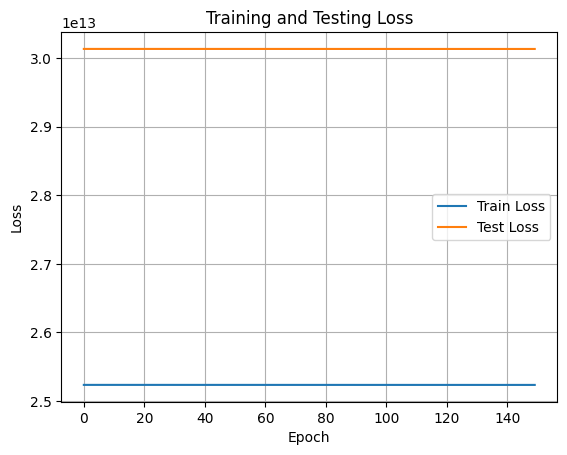

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.models import save_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("/content/Housing.csv")
print(data.columns)
target_variable = 'price'

if target_variable not in data.columns:
    raise KeyError(f"Target variable '{target_variable}' not found in the DataFrame. "
                   f"Available columns are: {data.columns.tolist()}")
categorical_features = data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

data = data.drop(categorical_features, axis=1)
data = pd.concat([data, encoded_df], axis=1)

X = data.drop(target_variable, axis=1).values
y = data[target_variable].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adadelta(), loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), verbose=1)

model.save("housing_ann_model.h5")
print("Model saved to 'housing_ann_model.h5'")
loss, mae = model.evaluate(X_test, y_test)
print(f"Testing MAE: {mae:.4f}")
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.grid(True)
plt.show()